In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
df =pd.read_csv(url)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Data Cleaning and Exploratory Analysis

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [79]:
# Change data type of column year to datetime

df['year'] = pd.to_datetime(df['year'], format='%Y')


In [80]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [81]:
# Show rows with missing values
df[df.isnull().any(axis=1)]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007-01-01
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007-01-01
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007-01-01
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007-01-01
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007-01-01
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007-01-01
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007-01-01
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008-01-01
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009-01-01
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009-01-01


In [82]:
# Drop rows with missing data in columns: 'bill_length_mm', 'bill_depth_mm', 'body_mass_g' and 'flipper_length_mm' because they are not relevant for us
df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [83]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64

In [84]:
# Calculate mean and median values for each sex
grouped_data = df.groupby('sex')['body_mass_g'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()

In [85]:
grouped_data

,sex,mean,median,<lambda_0>
0,female,3862.272727,3650.0,3700.0
1,male,4545.684524,4300.0,3900.0


In [86]:
# Create a function to fill missing values in the column sex
def fill_missing_sex(row):
  if pd.isna(row['sex']):
    male_mean = grouped_data[grouped_data['sex'] == 'male']['mean'].iloc[0]
    female_mean = grouped_data[grouped_data['sex'] == 'female']['mean'].iloc[0]
    if abs(row['body_mass_g'] - male_mean) < abs(row['body_mass_g'] - female_mean):
      return 'male'
    else:
      return 'female'
  else:
    return row['sex']

df['sex'] = df.apply(fill_missing_sex, axis=1)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [87]:
df.duplicated().sum()

0

In [88]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007-01-01
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007-01-01
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007-01-01
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007-01-01
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007-01-01
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009-01-01
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009-01-01
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009-01-01
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009-01-01


In [89]:
# Get descriptive statistics of the numerical columns
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [90]:
# Get the unique values in the categorical columns
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [91]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [92]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [93]:
# Get the range of values in the numerical columns
for col in df.select_dtypes(include=['int64', 'float64']):
  print(f"Range of '{col}': {df[col].min()} - {df[col].max()}")

Range of 'bill_length_mm': 32.1 - 59.6
Range of 'bill_depth_mm': 13.1 - 21.5
Range of 'flipper_length_mm': 172.0 - 231.0
Range of 'body_mass_g': 2700.0 - 6300.0


In [94]:
# Get the distribution of values in the categorical columns
for col in df.select_dtypes(include=['object']):
  print(f"Distribution of '{col}':")
  print(df[col].value_counts())

Distribution of 'species':
Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64
Distribution of 'island':
Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64
Distribution of 'sex':
male      172
female    170
Name: sex, dtype: int64


## Visualization

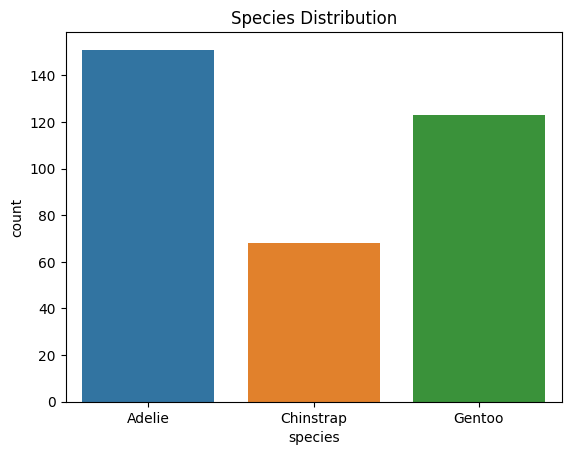

In [95]:
# Species Distribution: Use a bar chart with different colors to show the distribution of penguin species.

sns.barplot(x = 'species', y = 'count', data = df.groupby('species')['species'].count().reset_index(name='count'), hue ='species')
plt.title('Species Distribution')
plt.show()


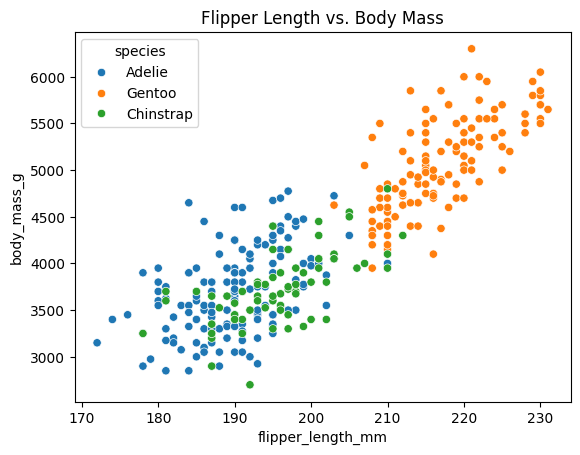

In [96]:
# prompt: Species Distribution: Use a bar chart to show the distribution of penguin species.

sns.scatterplot(df, x='flipper_length_mm', y ='body_mass_g', hue = 'species')
plt.title('Flipper Length vs. Body Mass')
plt.show()


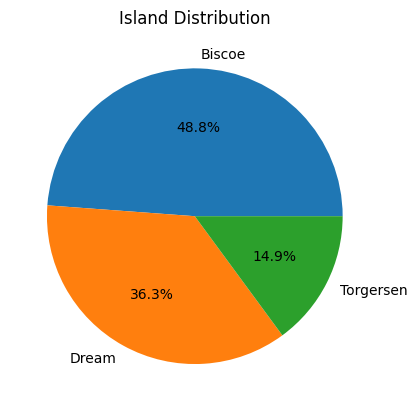

In [97]:
island_counts = df['island'].value_counts()
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%')
plt.title('Island Distribution')
plt.show()

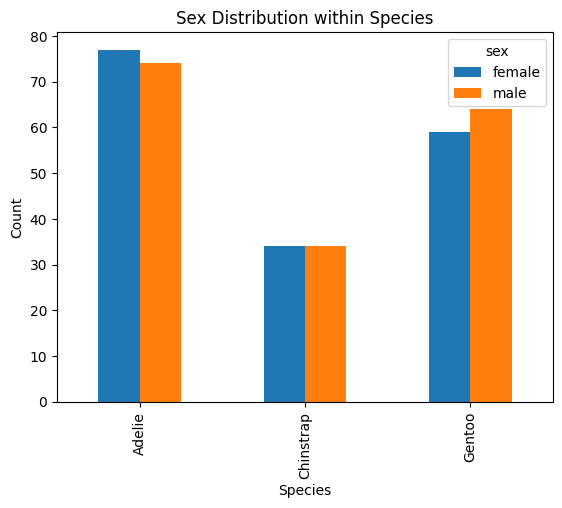

In [98]:
# Create a new DataFrame with species and sex counts
sex_distribution = df.groupby(['species', 'sex']).size().unstack()

# Plot the grouped bar chart
sex_distribution.plot(kind='bar', stacked=False)
plt.title('Sex Distribution within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [99]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007-01-01
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007-01-01
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007-01-01
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007-01-01
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007-01-01
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009-01-01
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009-01-01
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009-01-01
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009-01-01


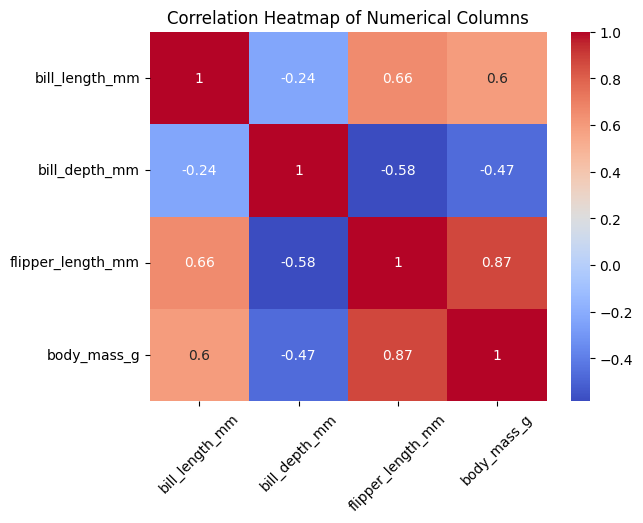

In [100]:
# Select the numerical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a heatmap
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and show the plot
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


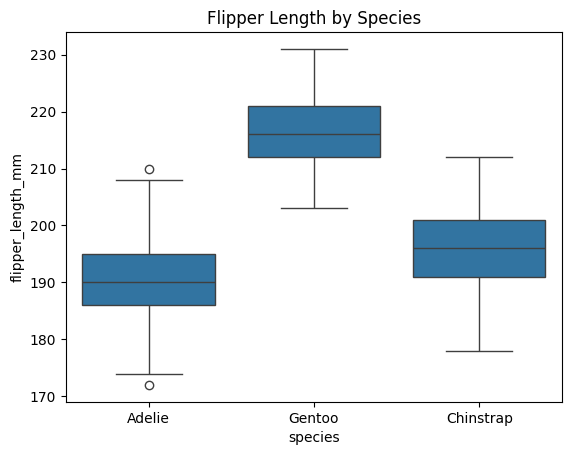

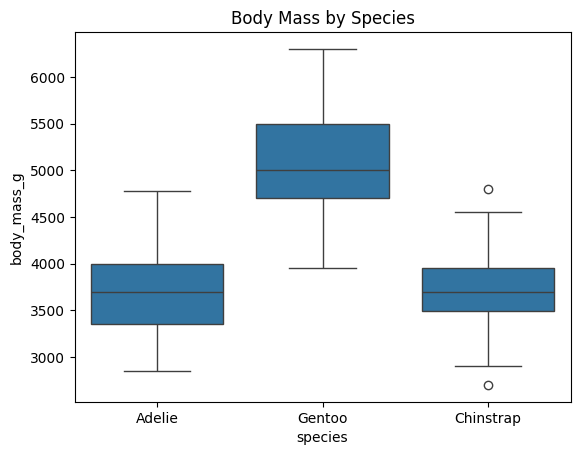

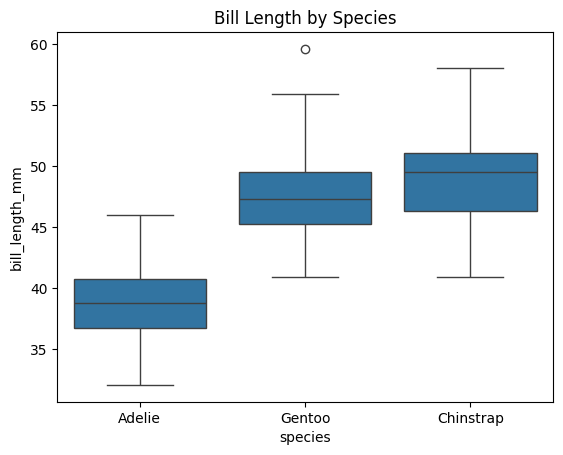

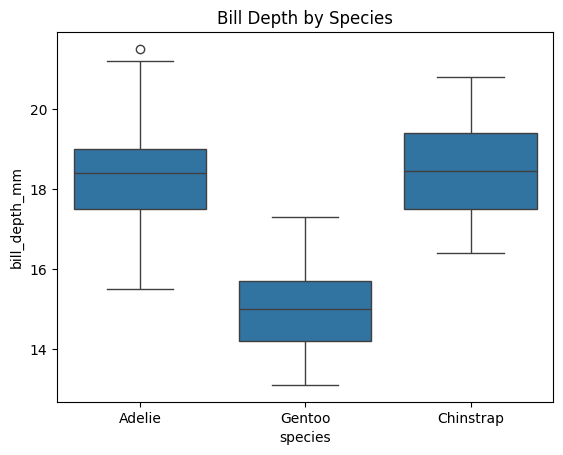

In [101]:
# Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.

import seaborn as sns

# Create boxplots for flipper length, body mass, and bill measurements, segmented by species
sns.boxplot(data=df, x="species", y="flipper_length_mm")
plt.title("Flipper Length by Species")
plt.show()

sns.boxplot(data=df, x="species", y="body_mass_g")
plt.title("Body Mass by Species")
plt.show()

sns.boxplot(data=df, x="species", y="bill_length_mm")
plt.title("Bill Length by Species")
plt.show()

sns.boxplot(data=df, x="species", y="bill_depth_mm")
plt.title("Bill Depth by Species")
plt.show()

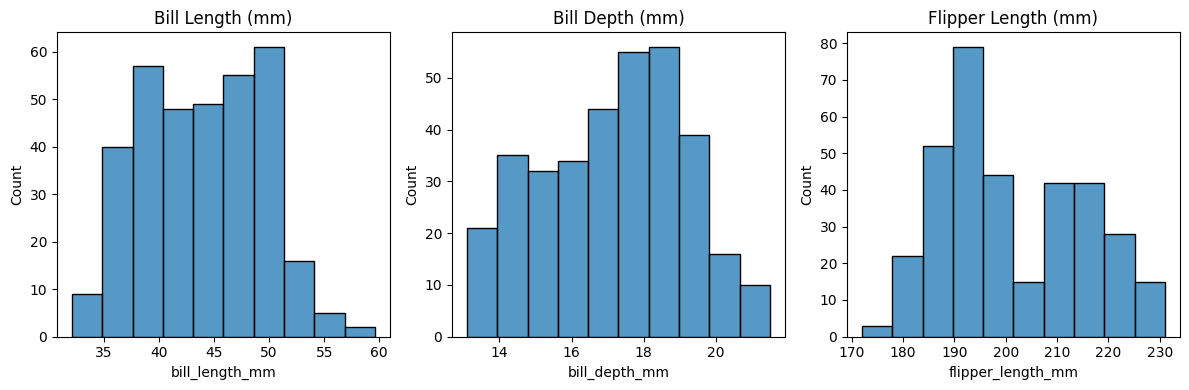

In [102]:
# Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Histogram for bill length
sns.histplot(data=df, x="bill_length_mm", bins=10, ax=axes[0])
axes[0].set_title("Bill Length (mm)")

# Histogram for bill depth
sns.histplot(data=df, x="bill_depth_mm", bins=10, ax=axes[1])
axes[1].set_title("Bill Depth (mm)")

# Histogram for flipper length
sns.histplot(data=df, x="flipper_length_mm", bins=10, ax=axes[2])
axes[2].set_title("Flipper Length (mm)")

# Show the plot
plt.tight_layout()
plt.show()


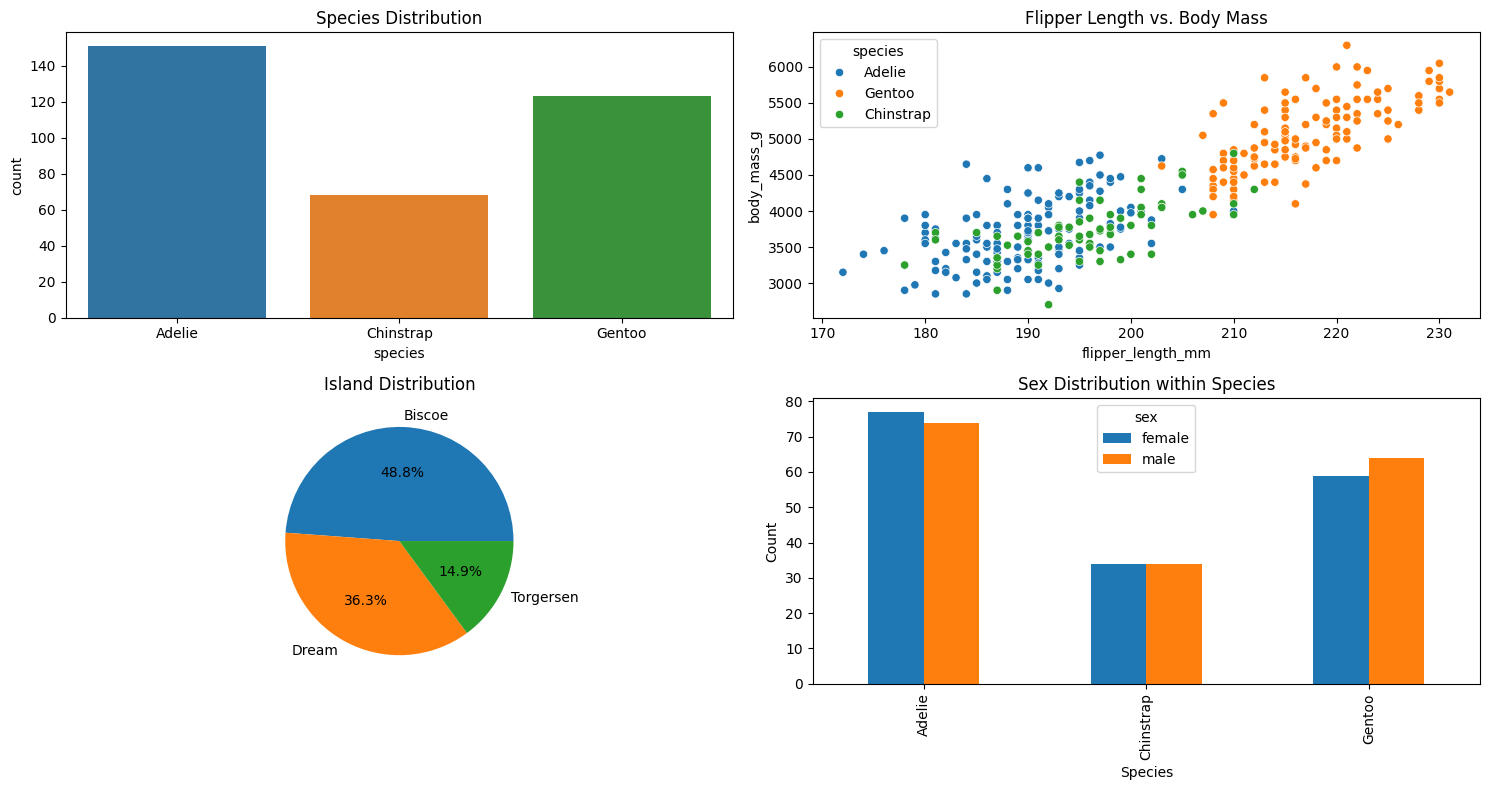

In [103]:
# Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot species distribution on the first subplot
sns.barplot(x='species', y='count', data=df.groupby('species')['species'].count().reset_index(name='count'), hue='species', ax=axes[0, 0])
axes[0, 0].set_title('Species Distribution')

# Plot flipper length vs. body mass on the second subplot
sns.scatterplot(df, x='flipper_length_mm', y='body_mass_g', hue='species', ax=axes[0, 1])
axes[0, 1].set_title('Flipper Length vs. Body Mass')

# Plot island distribution on the third subplot
island_counts = df['island'].value_counts()
axes[1, 0].pie(island_counts, labels=island_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Island Distribution')

# Plot sex distribution within species on the fourth subplot
sex_distribution = df.groupby(['species', 'sex']).size().unstack()
sex_distribution.plot(kind='bar', stacked=False, ax=axes[1, 1])
axes[1, 1].set_title('Sex Distribution within Species')
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Count')

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()


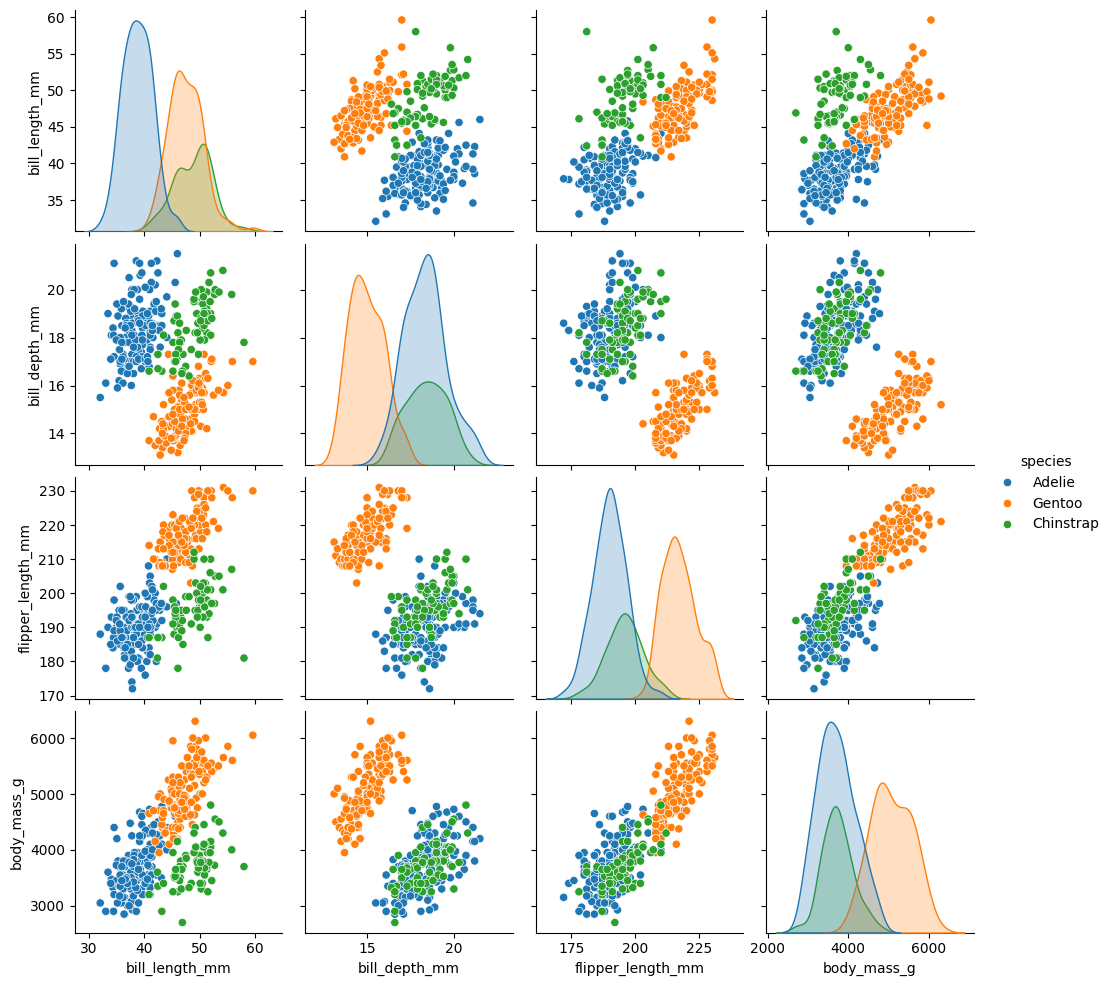

In [104]:
# Use Seaborn’s pairplot to visualize pairwise relationships in the dataset.

sns.pairplot(df, hue='species')
plt.show()
